# AssistMent2009 数据集分析

# 数据集简介
Skill builder 数据也称为掌握学习数据。该数据集来源于**技能训练**练习题组。当学生达到特定标准（通常设定为连续正确回答3道题）时，即被视为已掌握某项技能，此后系统将不再提供与该技能相关的题目。

# 数据集列含义
- order_id：问题日志的ID
  - 按照时间顺序排列
- assignmet：课程ID
- user_id：学生ID
- assistment_id：辅助问题ID
  - 与问题 ID 类似。这是构建器中用户将看到的问题的 ID。如果一个问题包含多个主问题和/或支架问题，则与单个问题相关的一切内容均称为一个辅助任务，并具有相同的辅助任务 ID。如果您在问题日志中看到相同的辅助任务编号，则表明这些问题是同一整体问题下的多个主问题（或支架问题）。
- problem_id：问题ID
  - 如果一个问题有多个主问题，则每个主问题将拥有不同的问题ID
- origin(0/1)：区分主问题和支撑问题。
  - 1表示主问题，0代表支撑问题
  - 如果一个主问题带有支撑问题，且学生回答错误或请求将问题分解为步骤，则会创建一个名为“支撑问题”的新问题。这将在文件中生成单独的问题日志行，其中变量 original 设置为 0。
- correct(0/1)：问题的回复是否正确
  - 1表示第一尝试即正确，2表示第一次尝试错误或者请求了帮助
  - 这一列通常是预测的目标。（补充说明：尼尔·赫弗南指出，虽然大多数情况下确实如此，但我们也有教师可以评分的作文题。尼尔认为，如果该数值为 0.25，这意味着教师给出了 4 分中的 1 分）
- attempt_count：尝试次数（学生输入答案的次数）
- ms_first_response：开始时间与学生首次操作（请求提示或输入答案）之间的时间间隔（单位：毫秒）
- tutor_mode：导师模式、测试模式和课后测试
  - ASSISTment09数据集中只有tutor和test两种导师模式，且test模式的题目占比极少
- answer_type：问题答案的类型
- sequence_id：习题集的ID
- student_class_id：学生的班级ID
- position：问题在作业页面上的位置
- type：问题集的名称
  - ASSISTment09数据集中只有一个问题集MasterySection
- base_sequence_id：用于标记习题集被复制的情况
  - 当一个习题集被复制的时候，该值为被复制的习题集的ID
- skill_id：技能ID
  - 在09数据集中，每个问题只与一个技能相关
- skill_name：技能名称
  - 对于skill_builder数据集，同一条作答记录若对应有多个不同的技能，则该条记录会被复制多次，以保证每一行记录只对应一个技能
- teacher_id：教师ID
- school_id：学校ID
- hint_count：学生期间请求提示的次数
- hint_total：系统能够提供的提示总数
- overlap_time：学生完成该问题所用的时间（单位：毫秒）
  - 在理想情况下，这应该为学生完成问题所花费的时间
  - 在系统中，这个字段经常被错误计算，建议使用其他字段来间接计算
- template_id：ASSISTments的模板ID
  - 具有相同模板ID的ASSISTments包含相似的问题
- answer_id：多选题答案的ID
- answer_text：填空题的答案文本
- first_action：学生首次操作的类型
- bottom_hint：
  - 如果此项为空，说明学生未请求提示
  - 对于支撑式问题，他们无法获得提示
- opportunity：学生在该技能上能够练习的次数
  - 对于技能构建器数据集，同一数据记录中不同技能的机会分布在不同的行中。这意味着，如果学生回答了一道多技能题目，该记录会被复制多次，每次复制都会被标记为其中一种多技能，并附上相应的机会计数
- opportunity_original：学生在该技能上能够练习的次数（仅计算原始问题）

# 补充说明

## 主问题和支撑式问题
当学生在解决一个**主问题**时回答错误或者主动要求将问题分解成小步骤时，ASSISTment系统会提供**一个或多个支撑式问题**。
- 支撑式问题在数据集中使用*original*字段进行标记
- 学生通常不能在回答支撑式问题时获取提示

## 导师模式
在数据集中*tutor_mode*列用于区分学生做题时系统处于导师(tutor)、测试(test_mode)、课前测试(pre_test)还是课后测试(post_test)。
在导师模式中，学生做题时可以获得即时反馈、提示或逐步辅导；在测试模式中，学生做题时系统不会给出任何反馈和指导信息。

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ASSISTments 2009 dataset
data = pd.read_csv(
    "data/assistment09/skill_builder_data_corrected.csv",
    low_memory=False,
    encoding="latin1",
    )

In [44]:
# 显示数据集的前十行
data.head(10)

order_id  assignment_id  user_id  assistment_id  problem_id  original  \
0  33022537         277618    64525          33139       51424         1   
1  33022709         277618    64525          33150       51435         1   
2  35450204         220674    70363          33159       51444         1   
3  35450295         220674    70363          33110       51395         1   
4  35450311         220674    70363          33196       51481         1   
5  35450555         220674    70363          33172       51457         1   
6  35450573         220674    70363          33174       51459         1   
7  35480603         220674    70363          33123       51408         1   
8  33140811         220674    70677          33168       51453         1   
9  33140919         220674    70677          33112       51397         1   

   correct  attempt_count  ms_first_response tutor_mode  ... hint_count  \
0        1              1              32454      tutor  ...          0   
1        1              1               4922      tutor  ...          0   
2        0              2              25390      tutor  ...          0   
3        1              1               4859      tutor  ...          0   
4        0             14              19813      tutor  ...          3   
5        1              1              16031      tutor  ...          0   
6        1              1              15047      tutor  ...          0   
7        1              1              10732      tutor  ...          0   
8        1              1              23241      tutor  ...          0   
9        1              1              11512      tutor  ...          0   

   hint_total  overlap_time  template_id answer_id  answer_text  first_action  \
0           3         32454        30799       NaN           26             0   
1           3          4922        30799       NaN           55             0   
2           3         42000        30799       NaN           88             0   
3           3          4859        30059       NaN           41             0   
4           4        124564        30060       NaN           65             0   
5           4         16031        30060       NaN           12             0   
6           4         15047        30060       NaN            6             0   
7           3         10732        30059       NaN           55             0   
8           4         23241        30060       NaN           12             0   
9           2         11512        30059       NaN           36             0   

  bottom_hint  opportunity  opportunity_original  
0         NaN            1                   1.0  
1         NaN            2                   2.0  
2         NaN            1                   1.0  
3         NaN            2                   2.0  
4         0.0            3                   3.0  
5         NaN            4                   4.0  
6         NaN            5                   5.0  
7         NaN            6                   6.0  
8         NaN            1                   1.0  
9         NaN            2                   2.0  

[10 rows x 30 columns]

In [45]:
# 显示数据集的基本统计信息
data.describe()

order_id  assignment_id        user_id  assistment_id  \
count  4.017560e+05  401756.000000  401756.000000  401756.000000   
mean   3.066256e+07  273701.845882   83414.154542   46443.517526   
std    5.264886e+06   11338.460017    7417.814021   11832.443427   
min    2.022408e+07  217900.000000      14.000000      86.000000   
25%    2.660218e+07  266784.000000   78970.000000   37046.000000   
50%    3.110513e+07  271629.000000   80111.000000   44498.000000   
75%    3.494364e+07  279158.000000   88142.000000   53142.000000   
max    3.831020e+07  291503.000000   96299.000000  106210.000000   

          problem_id       original        correct  attempt_count  \
count  401756.000000  401756.000000  401756.000000  401756.000000   
mean    81117.030011       0.817140       0.642923       1.596417   
std     25426.799662       0.386552       0.479139      12.050437   
min        83.000000       0.000000       0.000000       0.000000   
25%     58467.000000       1.000000       0.000000       1.000000   
50%     80734.000000       1.000000       1.000000       1.000000   
75%     93102.000000       1.000000       1.000000       1.000000   
max    207348.000000       1.000000       1.000000    3824.000000   

       ms_first_response    sequence_id  ...      school_id     hint_count  \
count       4.017560e+05  401756.000000  ...  401756.000000  401756.000000   
mean        4.748464e+04    7284.411088  ...    3031.291025       0.487470   
std         3.614590e+05    1497.941072  ...    1830.451486       1.187255   
min        -7.759575e+06    5870.000000  ...       1.000000       0.000000   
25%         8.518000e+03    5979.000000  ...    2770.000000       0.000000   
50%         1.945300e+04    6910.000000  ...    2770.000000       0.000000   
75%         4.457825e+04    8032.000000  ...    5056.000000       0.000000   
max         8.407692e+07   13362.000000  ...    9948.000000      10.000000   

          hint_total  overlap_time    template_id      answer_id  \
count  401756.000000  4.017560e+05  401756.000000   45454.000000   
mean        2.235817  5.964848e+04   39571.335029  145094.431667   
std         1.804244  3.822188e+05   12679.439926   47127.478285   
min         0.000000 -7.759575e+06      86.000000       1.000000   
25%         0.000000  1.066900e+04   30244.000000  104412.000000   
50%         3.000000  2.426450e+04   30987.000000  136247.000000   
75%         4.000000  5.698925e+04   46399.000000  184077.000000   
max        10.000000  8.407692e+07  106180.000000  323181.000000   

        first_action   bottom_hint    opportunity  opportunity_original  
count  401756.000000  67044.000000  401756.000000         328291.000000  
mean        0.130012      0.724092      20.553535             14.403307  
std         0.394099      0.446974      62.523994             62.393684  
min         0.000000      0.000000       1.000000              1.000000  
25%         0.000000      0.000000       3.000000              3.000000  
50%         0.000000      1.000000       8.000000              6.000000  
75%         0.000000      1.000000      19.000000             13.000000  
max         2.000000      1.000000    3371.000000           3371.000000  

[8 rows x 25 columns]

# 数据集中关键列的统计信息

# 数据集原始数据量
以下数据描述了原始数据集中包含的数据数量。

- 学生数量：4217
- 总问题数量：26688
  - 主问题数量：18209
  - 支撑问题数量：8479
- 技能数量：123

In [46]:
# 统计学生数量
num_students = data["user_id"].nunique()
print(f"Number of students: {num_students}")

# 统计问题数量
num_questions = data["problem_id"].nunique()
print(f"Number of questions: {num_questions}")

# 统计技能数量
num_skills = data["skill_id"].nunique()
print(f"Number of skills: {num_skills}")

# 主问题数量
num_main_questions = data[data["original"] == 1]["problem_id"].nunique()
print(f"Number of main questions: {num_main_questions}")

# 支撑问题数量
num_scaffolding_questions = data[data["original"] == 0]["problem_id"].nunique()
print(f"Number of scaffolding questions: {num_scaffolding_questions}")

Number of students: 4217
Number of questions: 26688
Number of skills: 123
Number of main questions: 18209
Number of scaffolding questions: 8479


# 数据缺失情况
- skill_id：63755
- skill_name：76119
- answer_id：356302
- answer_text：89208
- bottom_hint：334712
- opportunity_original：73465

In [47]:
# 统计原始数据中所有存在缺失值的列
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

skill_id                 63755
skill_name               76119
answer_id               356302
answer_text              89208
bottom_hint             334712
opportunity_original     73465
dtype: int64


# 统计数据量
以下数据通过一些统计量来描述数据集的结构。

- 平均每个学生的答题次数：95.27
- 每个问题平均关联的技能数量（排除没有关联技能的问题）：1.2

In [48]:
# 平均每个学生的答题次数
attempts_per_student = data.groupby("user_id")["problem_id"].count()
avg_attempts_per_student = attempts_per_student.mean()
median_attempts_per_student = attempts_per_student.median()
print(f"Average attempts per student: {avg_attempts_per_student:.2f}")
print(f"Median attempts per student: {median_attempts_per_student:.2f}")

# 每个问题关联的技能数量
skills_per_question = data.groupby("problem_id")["skill_id"].nunique()
skills_per_question = skills_per_question[skills_per_question > 0]  # 排除没有关联技能的问题
print("Skills per question statistics:")
print(skills_per_question.describe())
# 计算每个问题关联的技能数量的平均值和中位数
avg_skills_per_question = skills_per_question.mean()
median_skills_per_question = skills_per_question.median()
print(f"Average skills per question: {avg_skills_per_question:.2f}")
print(f"Median skills per question: {median_skills_per_question:.2f}")

Average attempts per student: 95.27
Median attempts per student: 26.00
Skills per question statistics:
count    17751.000000
mean         1.196890
std          0.470233
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: skill_id, dtype: float64
Average skills per question: 1.20
Median skills per question: 1.00


# 其他列的分析

- 技能信息
- 主问题和支撑问题
- 首次操作类型
- 题目的答案类型

### 技能 (skill_id, skill_name)
数据集中并不是每一个问题都有其对应的技能，整个数据集中存在8937个问题没有对应的技能ID（包括主问题和支撑问题）

In [49]:
# 技能的数量
skill_counts = data["skill_id"].dropna().unique()
print(f"Total unique skills: {len(skill_counts)}")

# 筛选出没有关联技能的问题
questions_without_skills = data[data["skill_id"].isnull()]["problem_id"].unique()
print(f"Number of questions without associated skills: {len(questions_without_skills)}")

Total unique skills: 123
Number of questions without associated skills: 8937


### 主问题和支撑问题 (original)
- 主问题：1
- 支撑问题：0

In [50]:
# 选择所有的主问题
main_questions = data[data["original"] == 1]["problem_id"].unique()
print(f"Total main questions: {len(main_questions)}")
# 选择所有的支撑问题
scaffolding_questions = data[data["original"] == 0]["problem_id"].unique()
print(f"Total scaffolding questions: {len(scaffolding_questions)}")

Total main questions: 18209
Total scaffolding questions: 8479


### 首次操作的类型 (first_action)
- 0：尝试作答
- 1：获取提示
- 2：支撑结构

> 在该数据集中，所有学生点击题目后都进行了上述三者之一的操作

In [51]:
# 首次操作的类型
first_action_types = data["first_action"].dropna().unique()
print("First action types in the dataset:", first_action_types)

First action types in the dataset: [0 1 2]


### 题目的答案类型 (answer_type)
- algebra（数字）：18660
- fill_in_1（填空）：3048
- choose_1（单项选择）：4900
- open_response（开放式回答）：5
- choose_n（多选题）：75

In [52]:
# 题目的答案类型
answer_type = data["answer_type"].dropna().unique()
print("Answer types in the dataset:", answer_type)

# 每个类型的题目数量分布
ablgebra_count = data[data["answer_type"] == "algebra"]["problem_id"].nunique()
fill_in_1_count = data[data["answer_type"] == "fill_in_1"]["problem_id"].nunique()
choose_count = data[data["answer_type"] == "choose_1"]["problem_id"].nunique()
open_response_count = data[data["answer_type"] == "open_response"]["problem_id"].nunique()
choose_n_count = data[data["answer_type"] == "choose_n"]["problem_id"].nunique()
print(f"Algebra questions: {ablgebra_count}")
print(f"Fill-in questions: {fill_in_1_count}")
print(f"Choose questions: {choose_count}")
print(f"Open response questions: {open_response_count}")
print(f"Choose-n questions: {choose_n_count}")

Answer types in the dataset: ['algebra' 'fill_in_1' 'choose_1' 'open_response' 'choose_n']
Algebra questions: 18660
Fill-in questions: 3048
Choose questions: 4900
Open response questions: 5
Choose-n questions: 75


### 复制的行数量

In [53]:
different_sequence = data[data["sequence_id"] != data["base_sequence_id"]]
print(f"Number of copy sequences: {different_sequence['sequence_id'].nunique()}")

Number of copy sequences: 320


# 数据结构可视化
这一板块中包含了对数据集中重要数据的可视化代码和结果。

- 学生的答题次数分布图
- 问题类型分布图
- 整体答题正确率分布图
- 每一个问题关联的技能数量

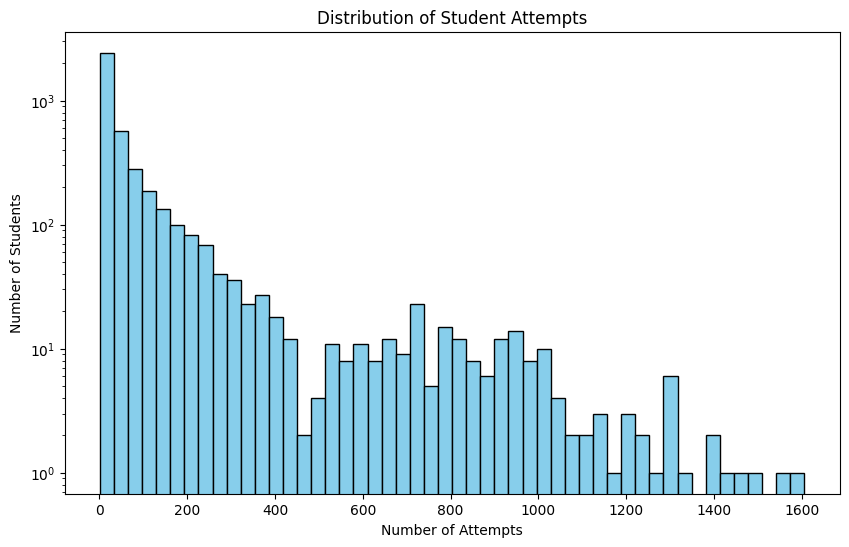

In [54]:
# 每个学生的答题次数
student_attempts = data.groupby("user_id")["problem_id"].count()

# 绘制学生答题次数的分布图
plt.figure(figsize=(10, 6))
plt.hist(student_attempts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Student Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Students')
plt.yscale('log')
plt.show()

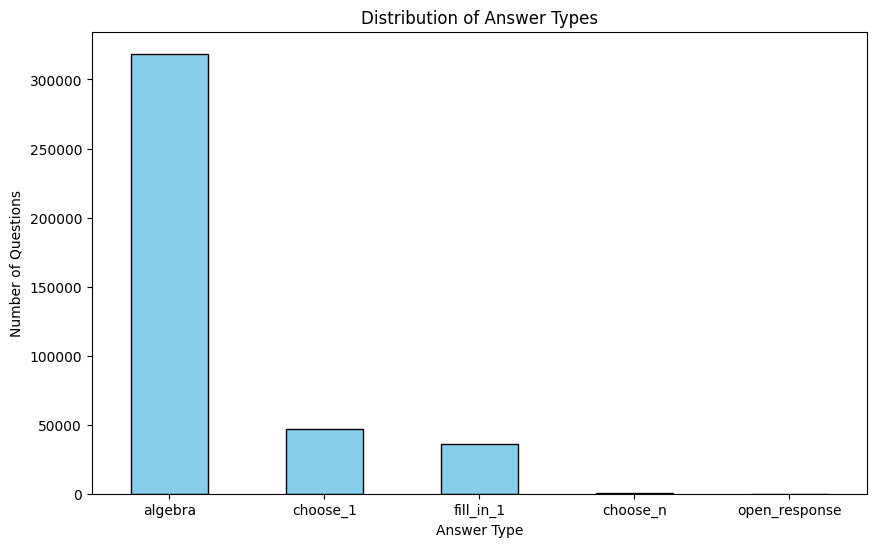

In [55]:
# 每个类型的问题数量分布
answer_type_counts = data["answer_type"].value_counts()

# 绘制问题类型数量的分布图
plt.figure(figsize=(10, 6))
answer_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Answer Types')
plt.xlabel('Answer Type')
plt.ylabel('Number of Questions')
plt.xticks(rotation=0)
plt.show()

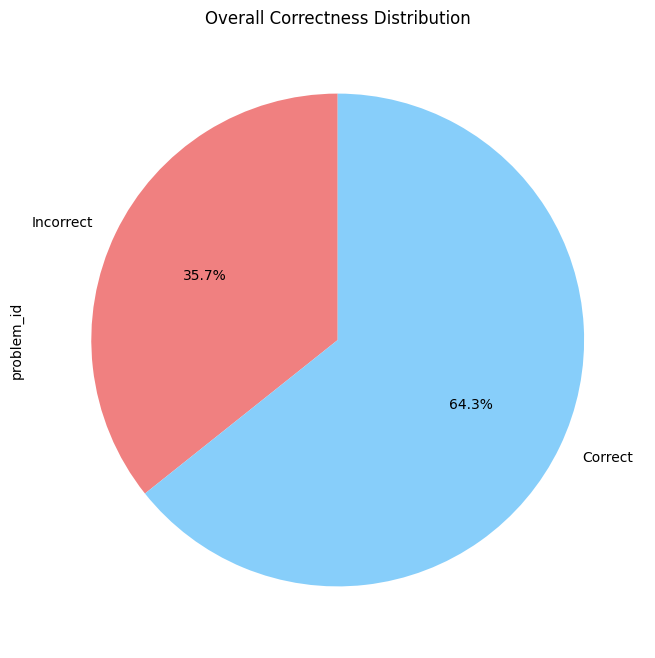

In [56]:
# 答题正确率
correct_data = data.groupby("correct")["problem_id"].count()
correct_data.index = ['Incorrect', 'Correct']

# 绘制答题正确率的饼图
plt.figure(figsize=(8, 8))
correct_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Overall Correctness Distribution')
plt.show()

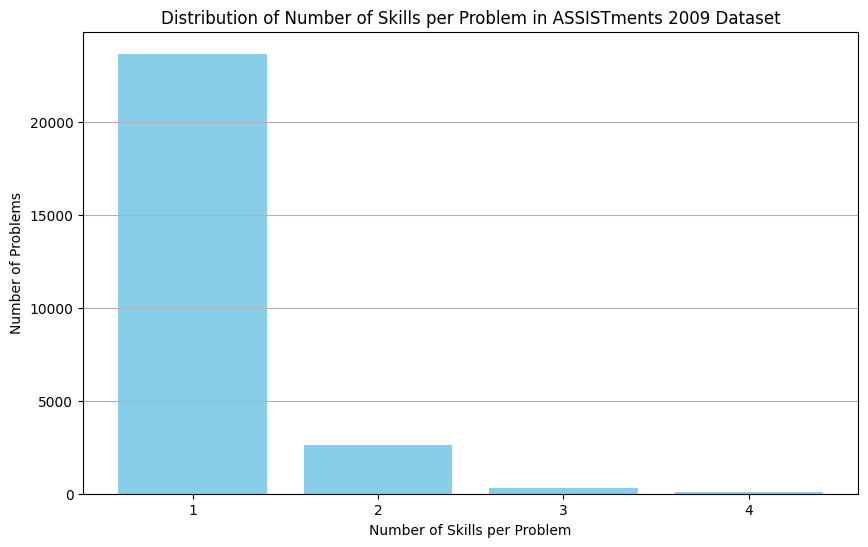

In [ ]:
# 每一个问题关联的技能数量
skill_counts = data[['problem_id', 'skill_name']].drop_duplicates().groupby('problem_id').size()
# 统计每个问题对应技能数量的分布
skill_count_distribution = skill_counts.value_counts().sort_index()
# 绘制直方图
plt.figure(figsize=(10, 6))
plt.bar(skill_count_distribution.index, skill_count_distribution.values, color='skyblue')
plt.xlabel('Number of Skills per Problem')
plt.ylabel('Number of Problems')
plt.title('Distribution of Number of Skills per Problem')
plt.xticks(skill_count_distribution.index)
plt.grid(axis='y')
plt.show()